In [1]:
import numpy as np
from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient
import matplotlib.pyplot as plt

import pandas as pd

<img src="IMG_20201111_144910.jpg" width="400">

In [20]:
client = EfdClient('summit_efd')
csc_index = 1

start = Time('2020-11-11T14:32:00') #this is UTC
#end = start+timedelta(days=1)
#end = Time(datetime.now())
end = Time('2020-11-11T14:59:30') #this is UTC
#start = end - timedelta(seconds=5)

In [21]:
df = await client.select_time_series('lsst.sal.MTMount.Camera_Cable_Wrap', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
pd.set_option('display.max_columns', None)

In [22]:
df

,AXES_PXI_Version,CCW_Angle_1,CCW_Angle_2,CCW_Current_1,CCW_Current_2,CCW_Interlocks,CCW_Negative_Directional_limit_switch,CCW_Positive_Directional_limit_switch,CCW_Rotator_Position,CCW_Speed_1,CCW_Speed_2,CCW_Status,CCW_Status_Drive_1,CCW_Status_Drive_2,TMA_PXI_Version,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,sub_Rotator_Position,timestamp
2020-11-11 14:32:00.025000+00:00,None,0.0257,0.0228,0.0,0.0,,False,False,-0.000578,0.0,0.0,Fault,Off,Off,1.0 CCWAux,1,1.605105e+09,6777,1.605105e+09,232e1726,68221,1.605105e+09,0,3.687950e+09
2020-11-11 14:32:00.123000+00:00,None,0.0257,0.0228,0.0,0.0,,False,False,-0.000578,0.0,0.0,Fault,Off,Off,1.0 CCWAux,1,1.605105e+09,6777,1.605105e+09,232e1726,68223,1.605105e+09,0,3.687950e+09
2020-11-11 14:32:00.214000+00:00,None,0.0257,0.0228,0.0,0.0,,False,False,-0.000578,0.0,0.0,Fault,Off,Off,1.0 CCWAux,1,1.605105e+09,6777,1.605105e+09,232e1726,68224,1.605105e+09,0,3.687950e+09
2020-11-11 14:32:00.317000+00:00,None,0.0257,0.0228,0.0,0.0,,False,False,-0.000578,0.0,0.0,Fault,Off,Off,1.0 CCWAux,1,1.605105e+09,6777,1.605105e+09,232e1726,68226,1.605105e+09,0,3.687950e+09
2020-11-11 14:32:00.416000+00:00,None,0.0257,0.0228,0.0,0.0,,False,False,-0.000578,0.0,0.0,Fault,Off,Off,1.0 CCWAux,1,1.605105e+09,6777,1.605105e+09,232e1726,68227,1.605105e+09,0,3.687950e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11 14:59:29.506000+00:00,None,-0.2201,0.0000,-0.1,13.9,,False,False,-0.000578,0.0,0.0,On\Enable,Off,Standstill,1.0 CCWAux,1,1.605107e+09,6777,1.605107e+09,232e1726,93045,1.605107e+09,0,3.687952e+09
2020-11-11 14:59:29.604000+00:00,None,-0.2201,0.0000,-0.1,13.9,,False,False,-0.000578,0.0,0.0,On\Enable,Off,Standstill,1.0 CCWAux,1,1.605107e+09,6777,1.605107e+09,232e1726,93046,1.605107e+09,0,3.687952e+09
2020-11-11 14:59:29.697000+00:00,None,-0.2201,0.0000,0.0,14.2,,False,False,-0.000578,0.0,0.0,On\Enable,Off,Standstill,1.0 CCWAux,1,1.605107e+09,6777,1.605107e+09,232e1726,93048,1.605107e+09,0,3.687952e+09
2020-11-11 14:59:29.795000+00:00,None,-0.2201,0.0000,0.0,14.2,,False,False,-0.000578,0.0,0.0,On\Enable,Off,Standstill,1.0 CCWAux,1,1.605107e+09,6777,1.605107e+09,232e1726,93049,1.605107e+09,0,3.687952e+09


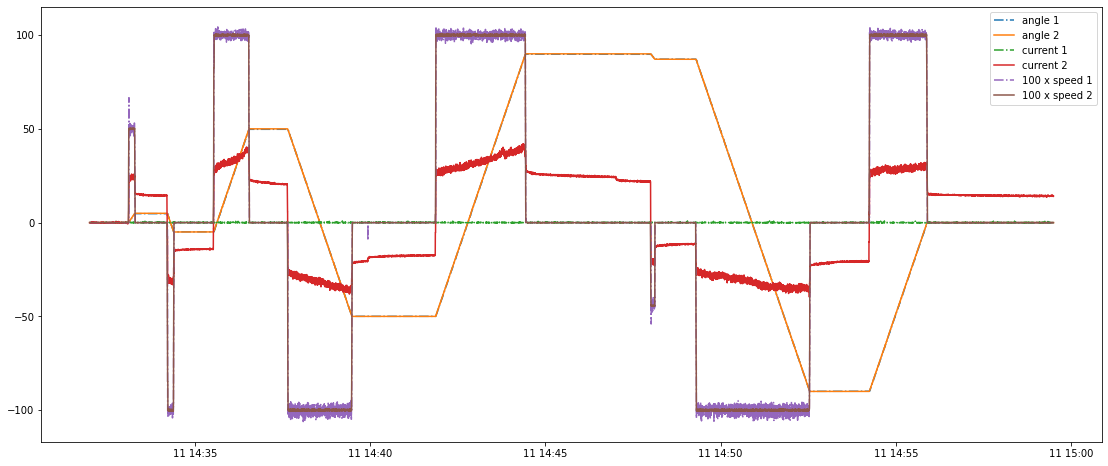

In [45]:
fig, ax = plt.subplots(figsize=(19,8))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['CCW_Angle_1'], label='angle 1',linestyle='-.')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['CCW_Angle_2'], label='angle 2')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['CCW_Current_1'], label='current 1',linestyle='-.')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['CCW_Current_2'], label='current 2')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['CCW_Speed_1']*100, label='100 x speed 1',linestyle='-.')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['CCW_Speed_2']*100, label='100 x speed 2')
plt.legend();

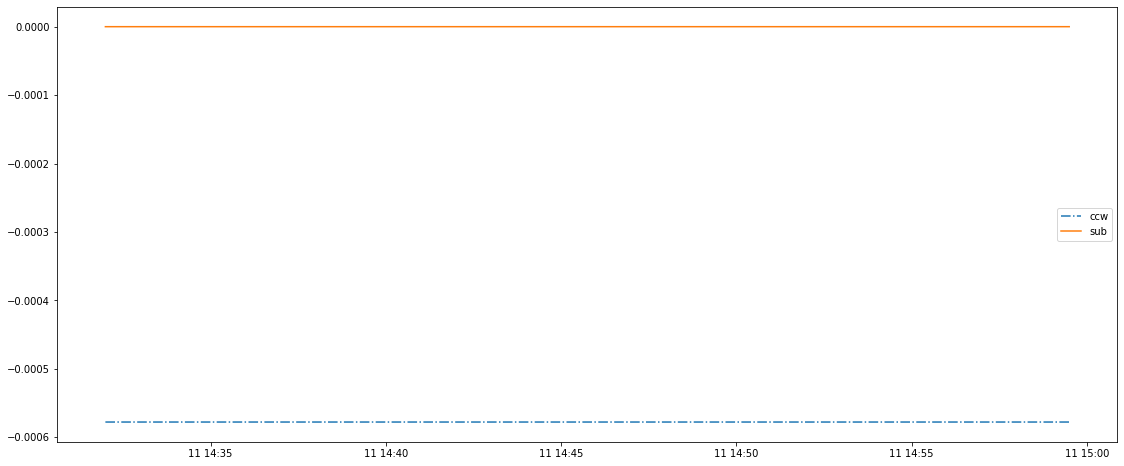

In [42]:
fig, ax = plt.subplots(figsize=(19,8))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['CCW_Rotator_Position'], label='ccw',linestyle='-.')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['sub_Rotator_Position'], label='sub')
plt.legend();

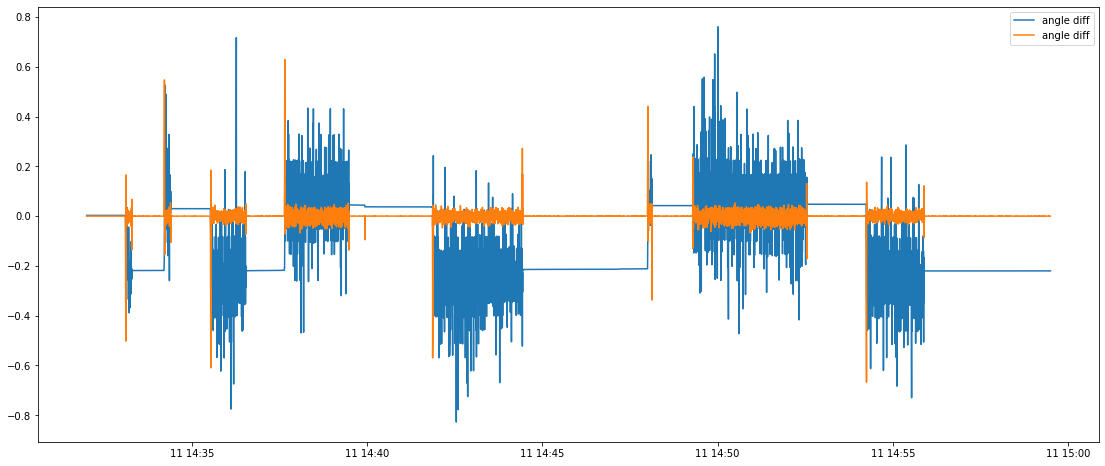

In [44]:
fig, ax = plt.subplots(figsize=(19,8))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['CCW_Angle_1']-df['CCW_Angle_2'], label='angle diff')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['CCW_Speed_1']-df['CCW_Speed_2'], label='angle diff')
plt.legend();